# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [45]:
import seaborn as sns

In [3]:
boston = load_boston()

In [4]:
bos = pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [5]:
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [6]:
bos['Price']=boston.target
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [7]:
#check if nan values are present or not
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [8]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
#input and output
X=bos.drop(columns=['Price'],axis=1)
y=bos['Price']

In [36]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
#linear regression
from sklearn.linear_model import LinearRegression

In [38]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred=model.predict(X_test)

In [40]:
from sklearn.metrics import r2_score

In [41]:
#accuracy
score=r2_score(y_test,y_pred)
print('Hence the accuracy for boston data using linear regression model is:',score.round(2))

Hence the accuracy for boston data using linear regression model is: 0.71


In [42]:
y_pred.shape

(152,)

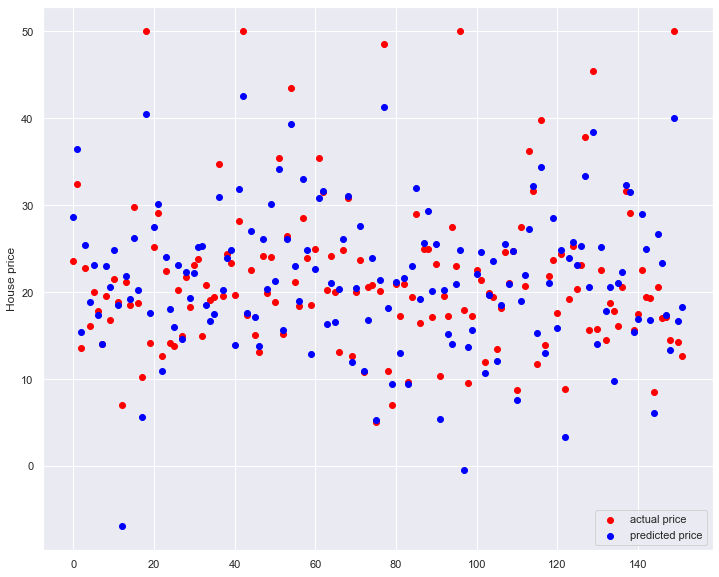

In [47]:
X1=[i for i in range(152)]

sns.set()
plt.rcParams['figure.figsize'] = 12, 10
plt.scatter(X1,y_test,color='red')
plt.scatter(X1,y_pred,color='blue')
plt.ylabel('House price')
labels=['actual price','predicted price']
plt.legend(labels)
plt.show()